**EDA**

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# read data if you are using Google Colab, in case of running this notebook on Jupyter, just omit this cell
from google.colab import files
uploaded = files.upload()

#**Data investigation**

In [0]:
# read dataset
df = pd.read_csv("training-1.csv")

In [20]:
df.head(10)

,id,age,app_type,owner_type,owner_influence,number_of_likes,number_of_comments,is_commented_by_connections,is_liked_by_me,is_liked_by_connections,poster_id,poster_gender,poster_focus,poster_influence,participant1_id,participant1_action,participant1_gender,participant1_focus,participant1_influence,participant2_id,participant2_action,participant2_gender,participant2_focus,participant2_influence,participant3_id,participant3_action,participant3_gender,participant3_focus,participant3_influence,rank
0,175339,6.315242e+10,other,space,0.99973,1,0,0,0,1,5,male,marketing,0.99962,146,liked,male,marketing,0.99899,22636,viewed,male,other,0.23077,3080,viewed,male,marketing,0.23077,0.73677
1,175348,6.309278e+10,forum,space,0.99977,0,2,1,0,0,146,male,marketing,0.99899,13659,commented,male,other,0.99756,146,commented,male,marketing,0.99899,22636,viewed,male,other,0.23077,0.78240
2,175353,6.309049e+10,forum,space,0.99977,0,3,1,0,0,146,male,marketing,0.99899,13659,commented,male,other,0.99756,13,commented,male,marketing,0.99895,146,commented,male,marketing,0.99899,0.82125
3,175371,6.301324e+10,other,space,0.99949,0,0,0,0,0,7,male,marketing,0.99886,22636,viewed,male,other,0.23077,3080,viewed,male,marketing,0.23077,44661,viewed,male,other,0.23077,0.61522
4,175372,6.301323e+10,other,space,0.99949,0,0,0,0,0,7,male,marketing,0.99886,22636,viewed,male,other,0.23077,3080,viewed,male,marketing,0.23077,44661,viewed,male,other,0.23077,0.61522
5,175373,6.301322e+10,other,space,0.99949,0,0,0,0,0,7,male,marketing,0.99886,22636,viewed,male,other,0.23077,3080,viewed,male,marketing,0.23077,44661,viewed,male,other,0.23077,0.61522
6,175374,6.301322e+10,other,space,0.99949,0,0,0,0,0,7,male,marketing,0.99886,22636,viewed,male,other,0.23077,3080,viewed,male,marketing,0.23077,44661,viewed,male,other,0.23077,0.61522
7,175375,6.301322e+10,other,space,0.99949,0,0,0,0,0,7,male,marketing,0.99886,22636,viewed,male,other,0.23077,3080,viewed,male,marketing,0.23077,44661,viewed,male,other,0.23077,0.61522
8,175376,6.301321e+10,other,space,0.99949,0,0,0,0,0,7,male,marketing,0.99886,22636,viewed,male,other,0.23077,3080,viewed,male,marketing,0.23077,44661,viewed,male,other,0.23077,0.61522
9,175377,6.301320e+10,other,space,0.99949,0,0,0,0,0,7,male,marketing,0.99886,22636,viewed,male,other,0.23077,3080,viewed,male,marketing,0.23077,44661,viewed,male,other,0.23077,0.61522


In [21]:
# check types of the features
df.dtypes

id                               int64
age                            float64
app_type                        object
owner_type                      object
owner_influence                float64
number_of_likes                  int64
number_of_comments               int64
is_commented_by_connections      int64
is_liked_by_me                   int64
is_liked_by_connections          int64
poster_id                        int64
poster_gender                   object
poster_focus                    object
poster_influence               float64
participant1_id                  int64
participant1_action             object
participant1_gender             object
participant1_focus              object
participant1_influence         float64
participant2_id                  int64
participant2_action             object
participant2_gender             object
participant2_focus              object
participant2_influence         float64
participant3_id                  int64
participant3_action      

In [22]:
# size of the data
df.shape

(9418, 30)

In [23]:
# check whether there are any missing data in the dataset
len(df.index)-df.count()
# as we can see, there are no missing values for all columns

id                             0
age                            0
app_type                       0
owner_type                     0
owner_influence                0
number_of_likes                0
number_of_comments             0
is_commented_by_connections    0
is_liked_by_me                 0
is_liked_by_connections        0
poster_id                      0
poster_gender                  0
poster_focus                   0
poster_influence               0
participant1_id                0
participant1_action            0
participant1_gender            0
participant1_focus             0
participant1_influence         0
participant2_id                0
participant2_action            0
participant2_gender            0
participant2_focus             0
participant2_influence         0
participant3_id                0
participant3_action            0
participant3_gender            0
participant3_focus             0
participant3_influence         0
rank                           0
dtype: int

In [24]:
# check whether there are any duplicates
df[df.duplicated()]
# result - empty dataset with duplicates, so there are no such rows

,id,age,app_type,owner_type,owner_influence,number_of_likes,number_of_comments,is_commented_by_connections,is_liked_by_me,is_liked_by_connections,poster_id,poster_gender,poster_focus,poster_influence,participant1_id,participant1_action,participant1_gender,participant1_focus,participant1_influence,participant2_id,participant2_action,participant2_gender,participant2_focus,participant2_influence,participant3_id,participant3_action,participant3_gender,participant3_focus,participant3_influence,rank


In [25]:
df.describe()

,id,age,owner_influence,number_of_likes,number_of_comments,is_commented_by_connections,is_liked_by_me,is_liked_by_connections,poster_id,poster_influence,participant1_id,participant1_influence,participant2_id,participant2_influence,participant3_id,participant3_influence,rank
count,9418.000000,9.418000e+03,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000
mean,220329.990444,3.393422e+10,0.776456,4.385007,1.650032,0.493948,0.033659,0.651625,49498.880548,0.965250,38805.655235,0.853969,39045.588341,0.757421,41212.968783,0.678432,0.765653
std,27824.849529,1.738314e+10,0.367675,6.943666,3.725452,0.499990,0.180359,0.476481,57392.718734,0.151862,50410.910028,0.300420,52515.926681,0.355775,48442.706126,0.378373,0.130952
min,93183.000000,4.147070e+09,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.090910,1.000000,0.090910,1.000000,0.090910,1.000000,0.090910,0.083330
25%,196717.250000,2.108517e+10,0.743590,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.995860,17.000000,0.994500,38.000000,0.230770,72.000000,0.230770,0.721930
50%,220176.500000,3.214917e+10,0.999230,2.000000,1.000000,0.000000,0.000000,1.000000,142.000000,0.998060,13659.000000,0.997560,3080.000000,0.996450,22636.000000,0.994890,0.821200
75%,243140.750000,4.719412e+10,0.999770,6.000000,2.000000,1.000000,0.000000,1.000000,117086.000000,0.998950,108025.000000,0.998860,110401.000000,0.998660,107711.000000,0.998280,0.854960
max,269294.000000,2.050660e+11,0.999920,64.000000,145.000000,1.000000,1.000000,1.000000,129104.000000,0.999620,129104.000000,0.999620,129104.000000,0.999620,129104.000000,0.999620,0.897890


# **Data preprocessing**

In [26]:
# check all possible values of 'gender' columns
print(df.poster_gender.value_counts(),
      df.participant1_gender.value_counts(),
      df.participant2_gender.value_counts(),
      df.participant3_gender.value_counts(), sep='\n---------------------\n')

male      7707
female    1711
Name: poster_gender, dtype: int64
---------------------
male      8134
female    1284
Name: participant1_gender, dtype: int64
---------------------
male      8187
female    1231
Name: participant2_gender, dtype: int64
---------------------
male      8323
female    1095
Name: participant3_gender, dtype: int64


As we can see, all columns related to the gender have just 2 possible values - male/female, so we can replace these categorical variables to binary (1/0).

In [0]:
# replace male/female values in 'gender' columns to 1/0
df.poster_gender.replace(['male', 'female'], [1, 0], inplace=True)
df.participant1_gender.replace(['male', 'female'], [1, 0], inplace=True)
df.participant2_gender.replace(['male', 'female'], [1, 0], inplace=True)
df.participant3_gender.replace(['male', 'female'], [1, 0], inplace=True)

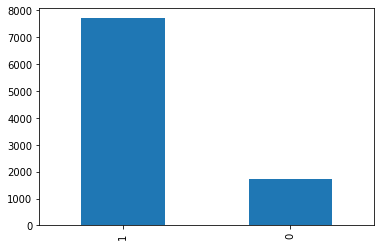

In [28]:
# distribution of the genders in the 'poster_gender' feature
df.poster_gender.value_counts().plot(kind='bar')

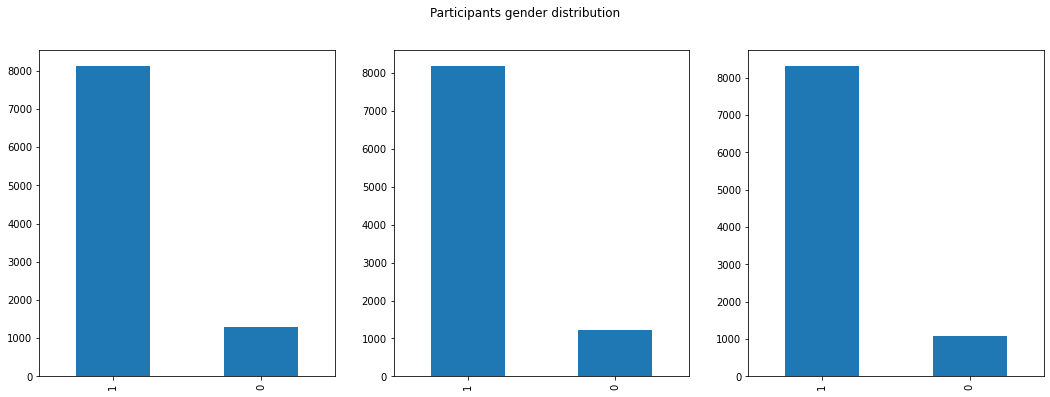

In [29]:
# plotting gender distribution for 'participant_gender' columns
plt.figure(figsize=(18, 6))

plt.subplot(131)
df.participant1_gender.value_counts().plot(kind='bar')

plt.subplot(132)
df.participant2_gender.value_counts().plot(kind='bar')

plt.subplot(133)
df.participant3_gender.value_counts().plot(kind='bar', label="1")

plt.suptitle('Participants gender distribution')
plt.show()

# Normalizing(Scaling)
Most of the numeric features are magnitudes from 0 to 1, except age, number_of_likes and number_of comments features. We need to scale them to same interval to make easier to converge the model`s optimazers. 

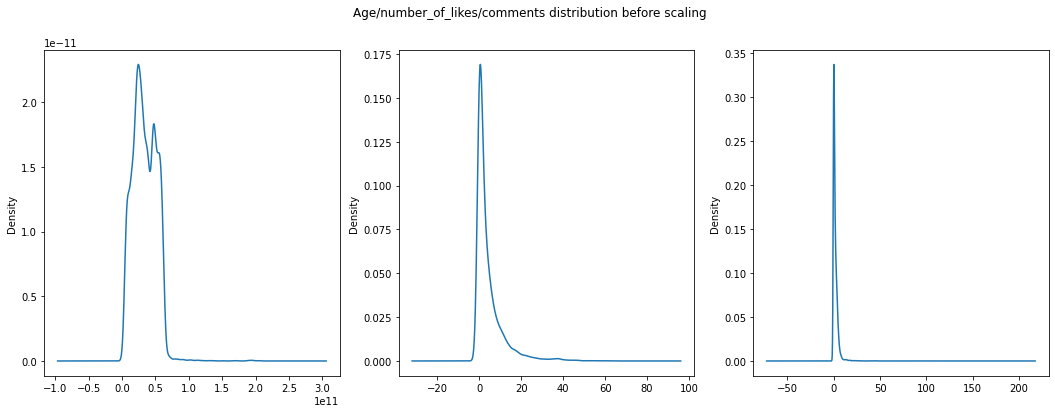

In [30]:
plt.figure(figsize=(18, 6))

plt.subplot(131)
df.age.plot.kde()

plt.subplot(132)
df.number_of_likes.plot.kde()

plt.subplot(133)
df.number_of_comments.plot.kde()

plt.suptitle('Age/number_of_likes/comments distribution before scaling')
plt.show()

In [0]:
# scale 3 columns using MinMax scaler
cols_to_norm = ['age','number_of_likes', 'number_of_comments']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

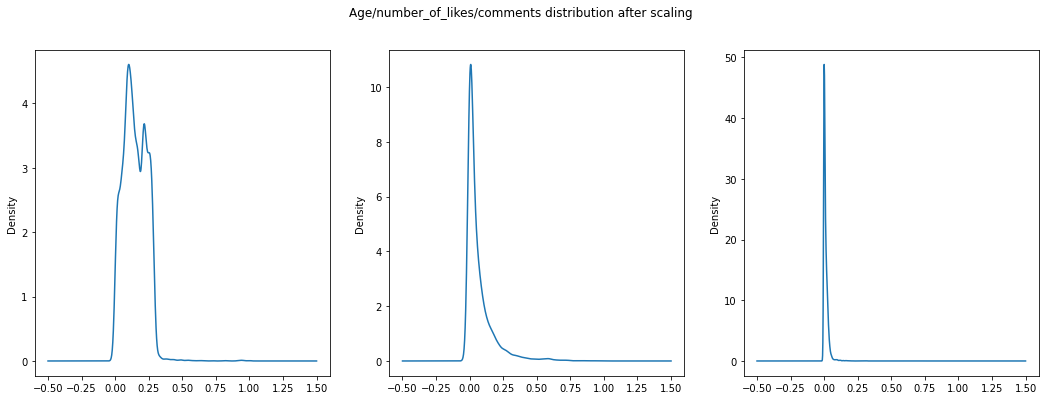

In [32]:
plt.figure(figsize=(18, 6))

plt.subplot(131)
df.age.plot.kde()

plt.subplot(132)
df.number_of_likes.plot.kde()

plt.subplot(133)
df.number_of_comments.plot.kde()

plt.suptitle('Age/number_of_likes/comments distribution after scaling')
plt.show()

In [33]:
df.describe()

,id,age,owner_influence,number_of_likes,number_of_comments,is_commented_by_connections,is_liked_by_me,is_liked_by_connections,poster_id,poster_gender,poster_influence,participant1_id,participant1_gender,participant1_influence,participant2_id,participant2_gender,participant2_influence,participant3_id,participant3_gender,participant3_influence,rank
count,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000,9418.000000
mean,220329.990444,0.148255,0.776456,0.068516,0.011380,0.493948,0.033659,0.651625,49498.880548,0.818327,0.965250,38805.655235,0.863665,0.853969,39045.588341,0.869293,0.757421,41212.968783,0.883733,0.678432,0.765653
std,27824.849529,0.086518,0.367675,0.108495,0.025693,0.499990,0.180359,0.476481,57392.718734,0.385596,0.151862,50410.910028,0.343162,0.300420,52515.926681,0.337098,0.355775,48442.706126,0.320562,0.378373,0.130952
min,93183.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.090910,1.000000,0.000000,0.090910,1.000000,0.000000,0.090910,1.000000,0.000000,0.090910,0.083330
25%,196717.250000,0.084303,0.743590,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.000000,0.995860,17.000000,1.000000,0.994500,38.000000,1.000000,0.230770,72.000000,1.000000,0.230770,0.721930
50%,220176.500000,0.139370,0.999230,0.031250,0.006897,0.000000,0.000000,1.000000,142.000000,1.000000,0.998060,13659.000000,1.000000,0.997560,3080.000000,1.000000,0.996450,22636.000000,1.000000,0.994890,0.821200
75%,243140.750000,0.214251,0.999770,0.093750,0.013793,1.000000,0.000000,1.000000,117086.000000,1.000000,0.998950,108025.000000,1.000000,0.998860,110401.000000,1.000000,0.998660,107711.000000,1.000000,0.998280,0.854960
max,269294.000000,1.000000,0.999920,1.000000,1.000000,1.000000,1.000000,1.000000,129104.000000,1.000000,0.999620,129104.000000,1.000000,0.999620,129104.000000,1.000000,0.999620,129104.000000,1.000000,0.999620,0.897890


As you can see now, all numeric features(except ids) are scaled to same interval (0-1), there are no missing data and duplicates here.

# Categorical data
We can not fit model with the text(categorical) data, so we need to hadle this. Here I`ll use one-hot encoding (or dummy variables), as there are not so many categorical features and possible categorigies of each of them. Also, I'll join some categories to other in few features to decrease number of dummy variables in the future

In [34]:
df.head()

,id,age,app_type,owner_type,owner_influence,number_of_likes,number_of_comments,is_commented_by_connections,is_liked_by_me,is_liked_by_connections,poster_id,poster_gender,poster_focus,poster_influence,participant1_id,participant1_action,participant1_gender,participant1_focus,participant1_influence,participant2_id,participant2_action,participant2_gender,participant2_focus,participant2_influence,participant3_id,participant3_action,participant3_gender,participant3_focus,participant3_influence,rank
0,175339,0.293677,other,space,0.99973,0.015625,0.000000,0,0,1,5,1,marketing,0.99962,146,liked,1,marketing,0.99899,22636,viewed,1,other,0.23077,3080,viewed,1,marketing,0.23077,0.73677
1,175348,0.293381,forum,space,0.99977,0.000000,0.013793,1,0,0,146,1,marketing,0.99899,13659,commented,1,other,0.99756,146,commented,1,marketing,0.99899,22636,viewed,1,other,0.23077,0.78240
2,175353,0.293369,forum,space,0.99977,0.000000,0.020690,1,0,0,146,1,marketing,0.99899,13659,commented,1,other,0.99756,13,commented,1,marketing,0.99895,146,commented,1,marketing,0.99899,0.82125
3,175371,0.292985,other,space,0.99949,0.000000,0.000000,0,0,0,7,1,marketing,0.99886,22636,viewed,1,other,0.23077,3080,viewed,1,marketing,0.23077,44661,viewed,1,other,0.23077,0.61522
4,175372,0.292985,other,space,0.99949,0.000000,0.000000,0,0,0,7,1,marketing,0.99886,22636,viewed,1,other,0.23077,3080,viewed,1,marketing,0.23077,44661,viewed,1,other,0.23077,0.61522


other       7069
forum       1289
wiki         870
calendar     174
social         8
poll           8
Name: app_type, dtype: int64


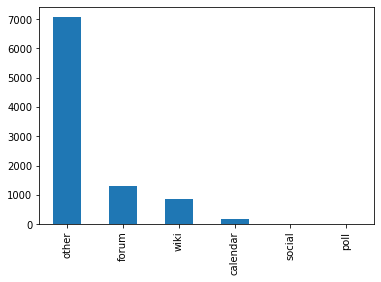

In [35]:
print(df.app_type.value_counts())
df.app_type.value_counts().plot(kind="bar")

For 'app_type' column we see only 8 entries of 'poll' and 'social' (it is quite small amount, if we take into account size of the whole dataset(~9500 entries)), so we can attribute them to the 'other' category. That will not make a big deal, and we will not lose any data.

In [0]:
df.app_type.replace(['poll', 'social'], 'other', inplace=True)

In [38]:
# here we see that owner_type has only 2 categories, so we will not join here anything
df.owner_type.value_counts()

space    7701
user     1717
Name: owner_type, dtype: int64

marketing      6936
other          1839
sales           437
engineering     182
none             24
Name: poster_focus, dtype: int64


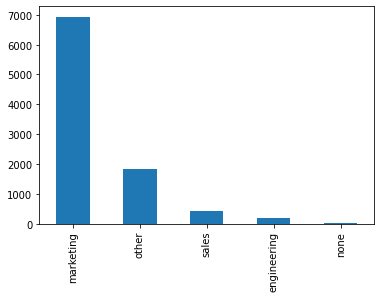

In [40]:
print(df.poster_focus.value_counts())
df.poster_focus.value_counts().plot(kind="bar")

Here we see that we can join 'none' category to the 'other'

In [0]:
df.poster_focus.replace('none', 'other', inplace=True)

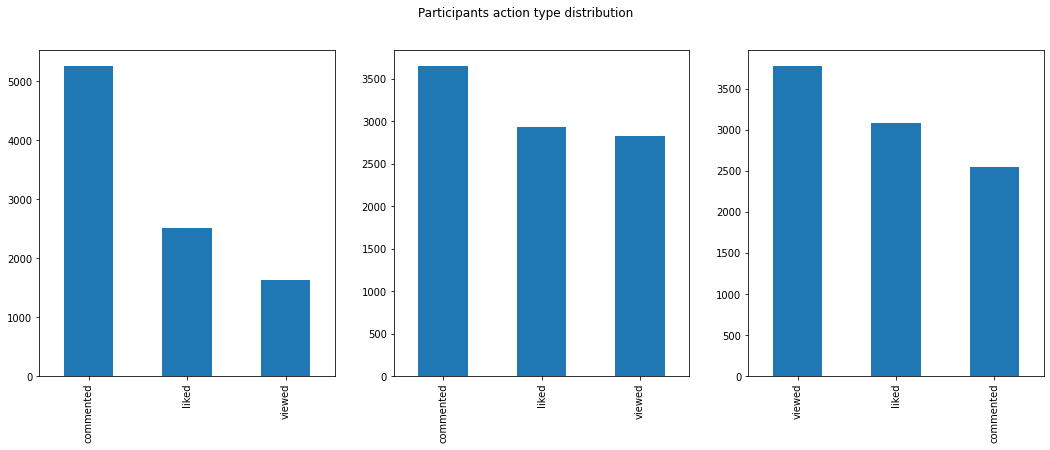

In [42]:
plt.figure(figsize=(18, 6))

plt.subplot(131)
df.participant1_action.value_counts().plot(kind='bar')

plt.subplot(132)
df.participant2_action.value_counts().plot(kind='bar')

plt.subplot(133)
df.participant3_action.value_counts().plot(kind='bar')

plt.suptitle('Participants action type distribution')
plt.show()

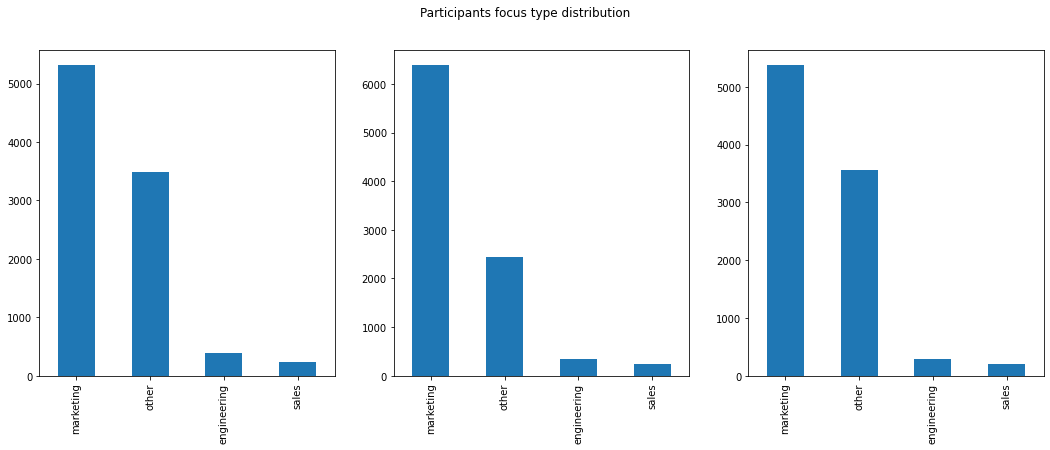

In [43]:
plt.figure(figsize=(18, 6))

plt.subplot(131)
df.participant1_focus.value_counts().plot(kind='bar')

plt.subplot(132)
df.participant2_focus.value_counts().plot(kind='bar')

plt.subplot(133)
df.participant3_focus.value_counts().plot(kind='bar')

plt.suptitle('Participants focus type distribution')
plt.show()

For participants action and type features all categories are normally distributed, so we will not join anything here

In [0]:
# create dummy variables from categorical features
df = pd.get_dummies(df)

In [45]:
df

,id,age,owner_influence,number_of_likes,number_of_comments,is_commented_by_connections,is_liked_by_me,is_liked_by_connections,poster_id,poster_gender,poster_influence,participant1_id,participant1_gender,participant1_influence,participant2_id,participant2_gender,participant2_influence,participant3_id,participant3_gender,participant3_influence,rank,app_type_calendar,app_type_forum,app_type_other,app_type_wiki,owner_type_space,owner_type_user,poster_focus_engineering,poster_focus_marketing,poster_focus_other,poster_focus_sales,participant1_action_commented,participant1_action_liked,participant1_action_viewed,participant1_focus_engineering,participant1_focus_marketing,participant1_focus_other,participant1_focus_sales,participant2_action_commented,participant2_action_liked,participant2_action_viewed,participant2_focus_engineering,participant2_focus_marketing,participant2_focus_other,participant2_focus_sales,participant3_action_commented,participant3_action_liked,participant3_action_viewed,participant3_focus_engineering,participant3_focus_marketing,participant3_focus_other,participant3_focus_sales
0,175339,0.293677,0.99973,0.015625,0.000000,0,0,1,5,1,0.99962,146,1,0.99899,22636,1,0.23077,3080,1,0.23077,0.73677,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,175348,0.293381,0.99977,0.000000,0.013793,1,0,0,146,1,0.99899,13659,1,0.99756,146,1,0.99899,22636,1,0.23077,0.78240,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
2,175353,0.293369,0.99977,0.000000,0.020690,1,0,0,146,1,0.99899,13659,1,0.99756,13,1,0.99895,146,1,0.99899,0.82125,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
3,175371,0.292985,0.99949,0.000000,0.000000,0,0,0,7,1,0.99886,22636,1,0.23077,3080,1,0.23077,44661,1,0.23077,0.61522,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
4,175372,0.292985,0.99949,0.000000,0.000000,0,0,0,7,1,0.99886,22636,1,0.23077,3080,1,0.23077,44661,1,0.23077,0.61522,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9413,268785,0.001000,0.99992,0.546875,0.041379,1,0,1,120290,1,0.99876,5,1,0.99962,110401,1,0.99788,120290,1,0.99876,0.87642,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
9414,257854,0.042291,0.99973,0.062500,0.006897,1,0,1,5,1,0.99962,5,1,0.99962,13,1,0.99895,126985,1,0.99466,0.85481,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
9415,269249,0.000020,0.99973,0.187500,0.000000,0,0,1,5,1,0.99962,25,1,0.99433,119825,0,0.99754,129104,0,0.99500,0.84820,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
9416,269255,0.000016,0.79592,0.078125,0.000000,0,0,1,99314,0,0.99589,123797,0,0.99586,119825,0,0.99754,127307,1,0.99133,0.83259,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0


# Correlation

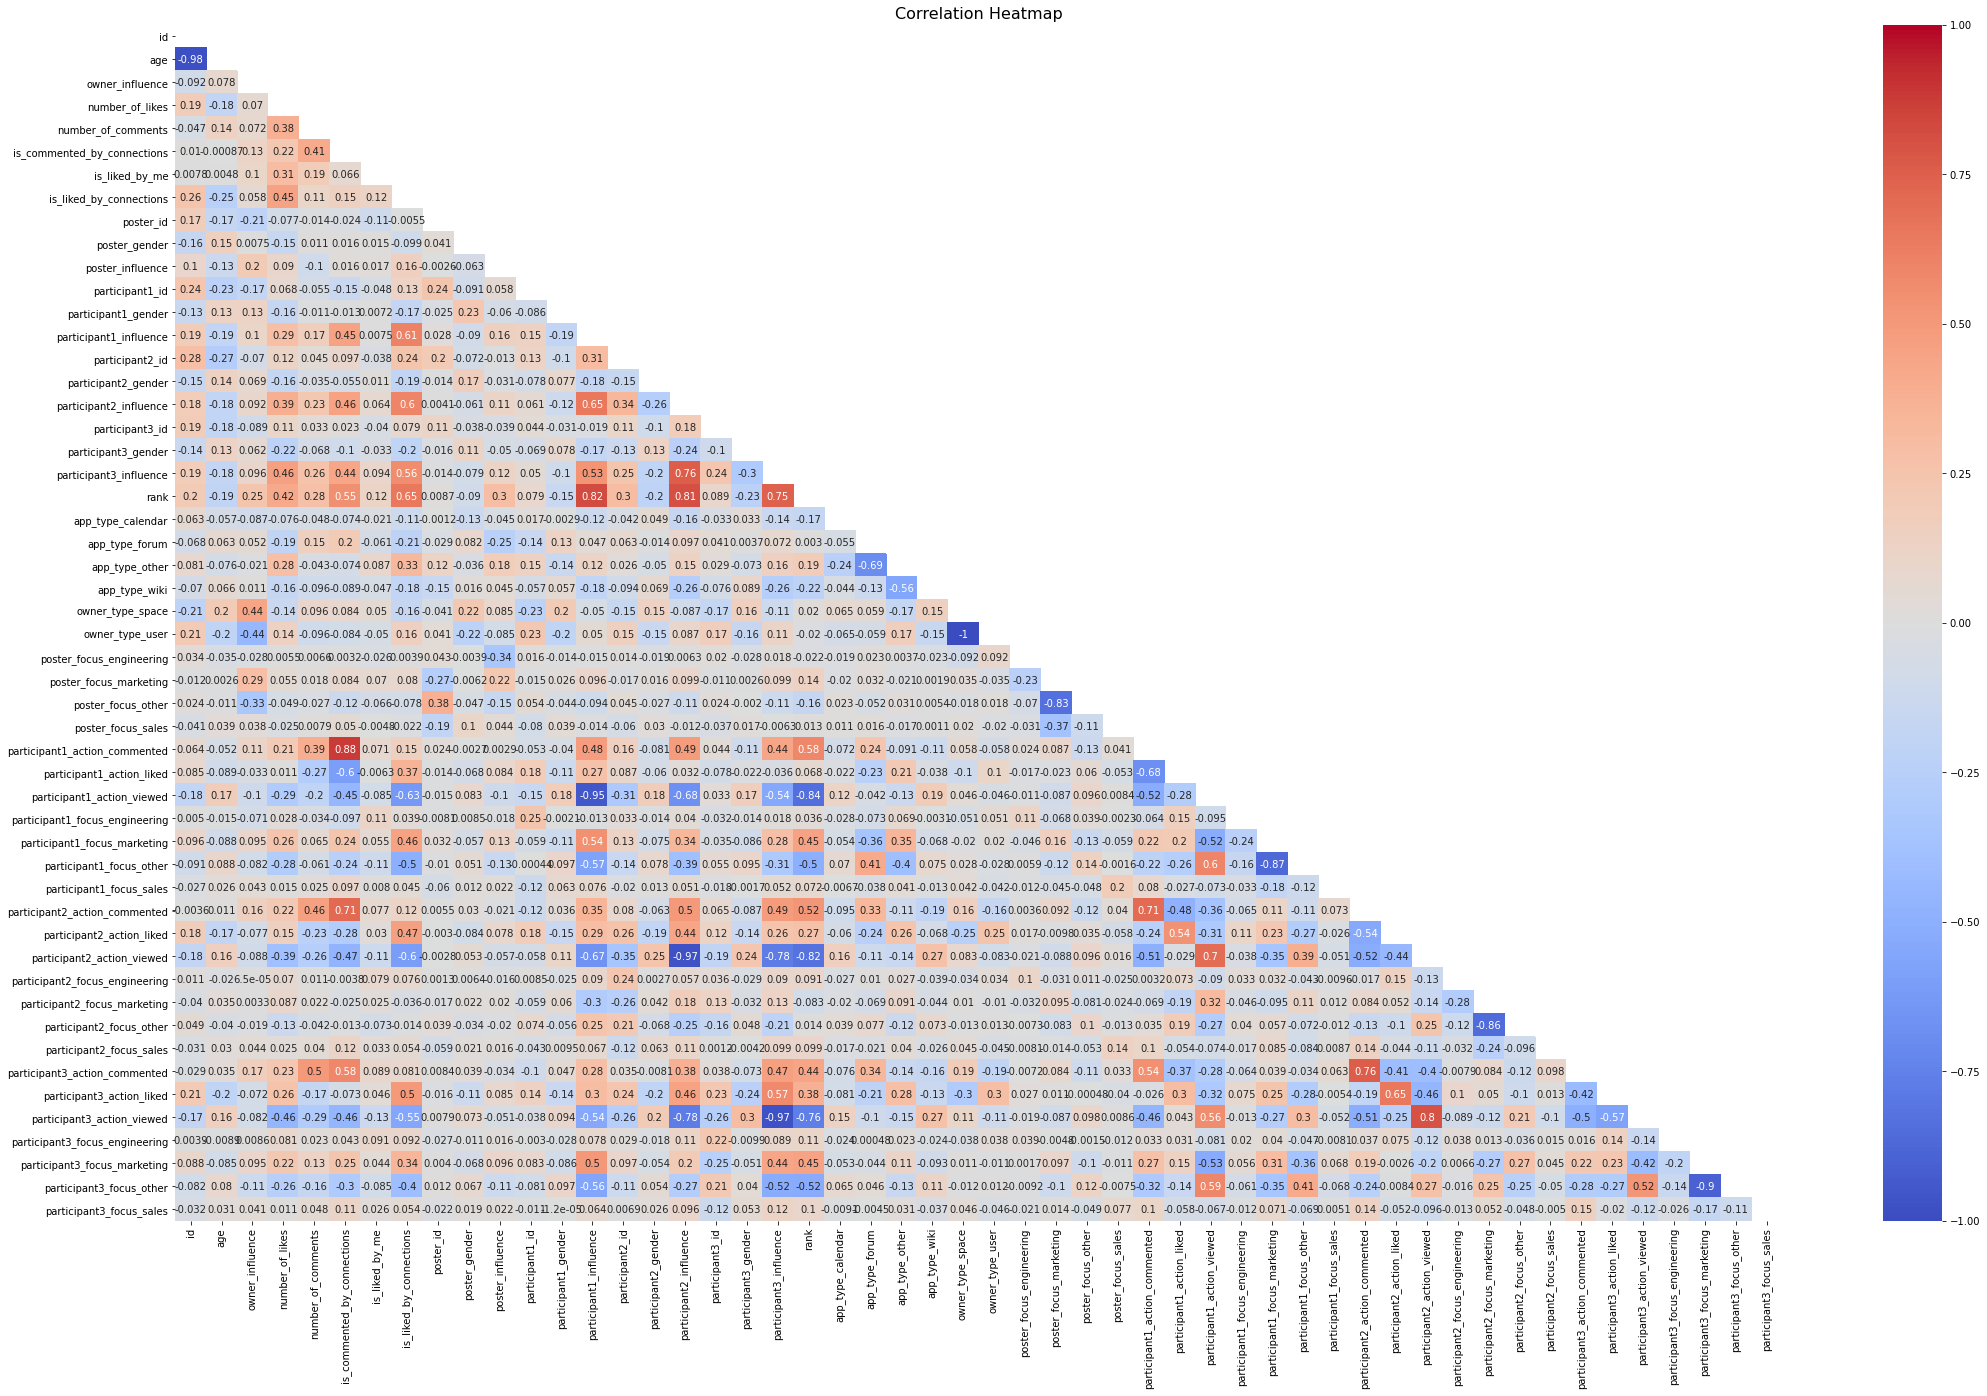

In [49]:
#plot correlation matrix
plt.figure(figsize = (36,22))
plt.title('Correlation Heatmap', fontsize = 16);

# Mask to remove redundancy from the heatmap.
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax = 1, cmap = "coolwarm",  annot = True);

As we can see there are some features that are low correlated to the target variable (rank). So, we can drop them to make convergence of the model`s optimazers more faster, with minimal accuracy lost

In [0]:
low_corr_columns = ['age', 'id', 'poster_id', 'poster_gender', 'participant1_id', 'participant2_id',
                    'participant3_id', 'participant1_gender', 'participant2_gender', 'participant3_gender']
df.drop(low_corr_columns, axis=1, inplace=True)

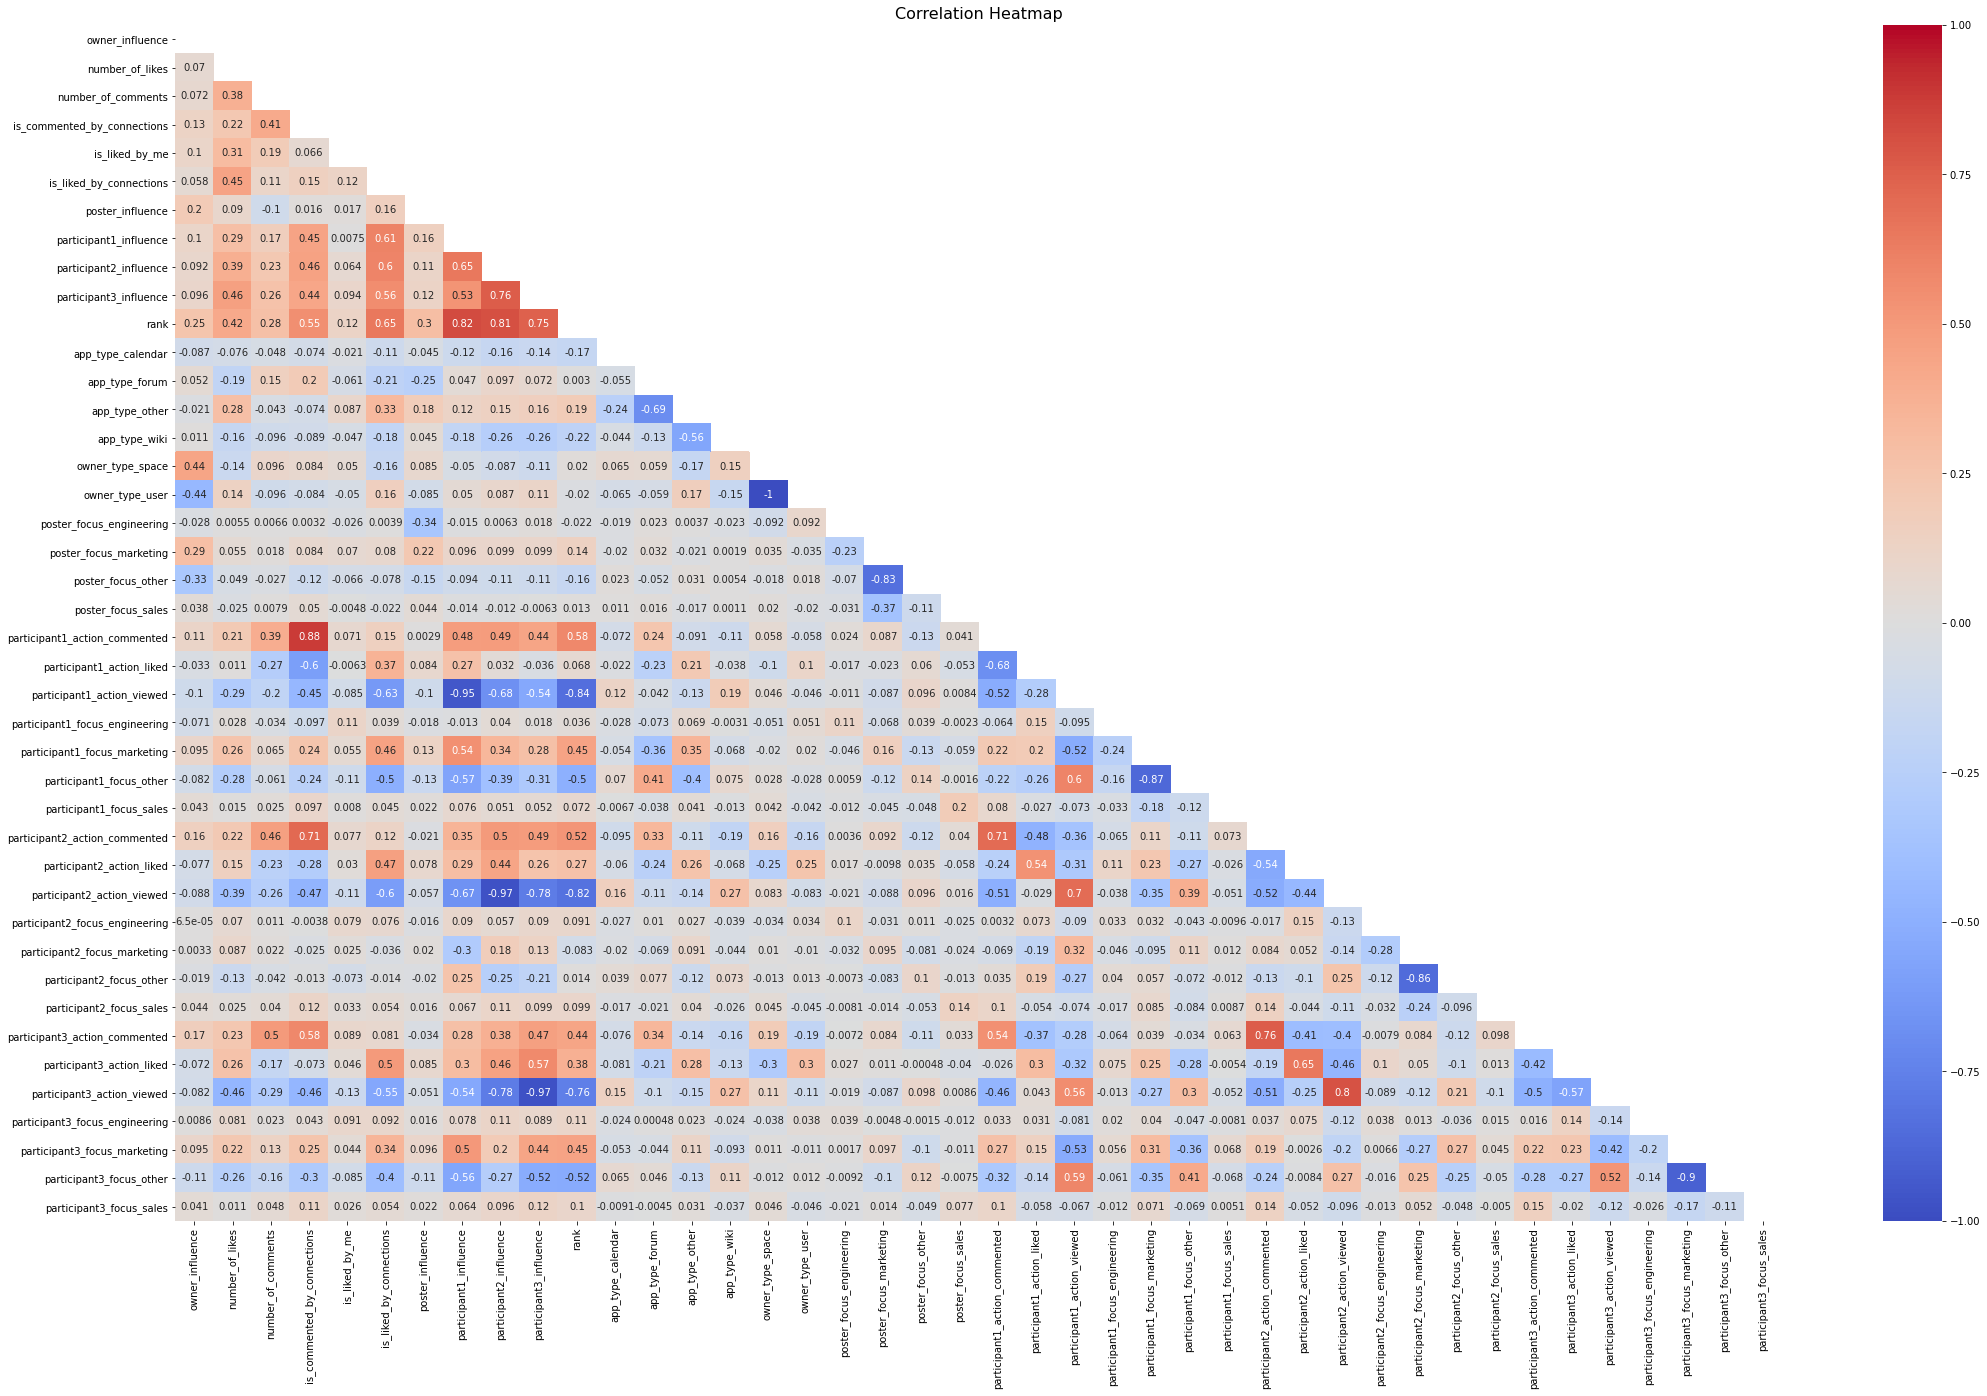

In [51]:
plt.figure(figsize = (36,22))
plt.title('Correlation Heatmap', fontsize = 16);

# Mask to remove redundancy from the heatmap.
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax = 1, cmap = "coolwarm",  annot = True);